Citations: [Q2 done with the help of datatowardsscience.com]

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [2]:
test_df = pd.read_csv(r"C:\Users\Shrey\Downloads\test.csv")
train_df = pd.read_csv(r"C:\Users\Shrey\Downloads\train.csv")

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
de = train_df['Age'].corr(train_df['Survived'])
print(de)


-0.07722109457217764


Text(0.5, 1.0, 'Age wrt Survived')

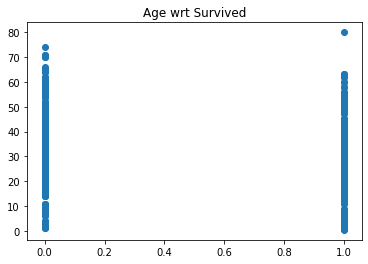

In [5]:
plt.scatter(train_df.Survived, train_df.Age)   
plt.title("Age wrt Survived")

C:\Users\shrey\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\shrey\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


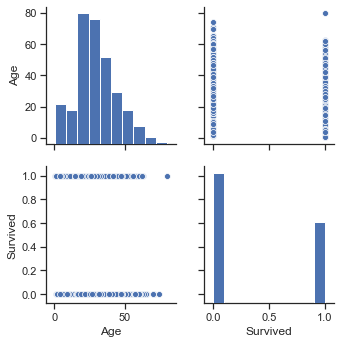

In [6]:
df1 = train_df[['Age','Survived']]
sns.set(style="ticks")
sns.pairplot(df1)

               Age  Survived
Age       1.000000 -0.077221
Survived -0.077221  1.000000


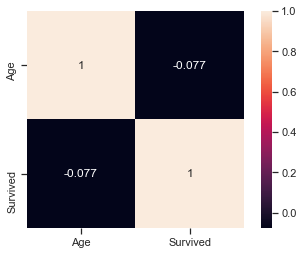

In [7]:
df2 = df1.corr(method = 'pearson')
print(df2)
sns.heatmap(df2,
            xticklabels=df2.columns,
            yticklabels=df2.columns,square=True, annot= True)

               Age  Survived
Age       1.000000 -0.043385
Survived -0.043385  1.000000


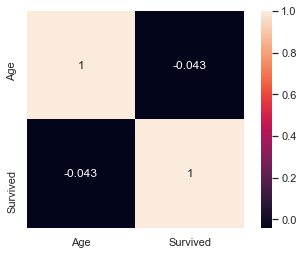

In [27]:
df3 = df1.corr(method = 'kendall')
print(df3)
sns.heatmap(df3,
            xticklabels=df3.columns,
            yticklabels=df3.columns,square=True, annot= True)

In [9]:
df4 = df1.corr(method = 'spearman')
print(df4)

               Age  Survived
Age       1.000000 -0.052565
Survived -0.052565  1.000000


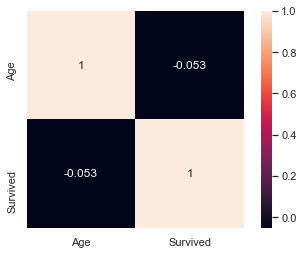

In [28]:
sns.heatmap(df4,
            xticklabels=df4.columns,
            yticklabels=df4.columns,square=True, annot= True)

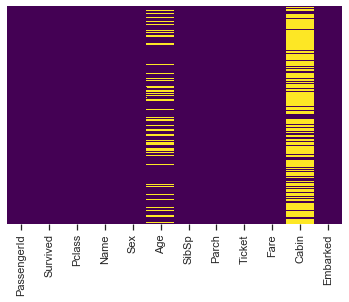

In [11]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

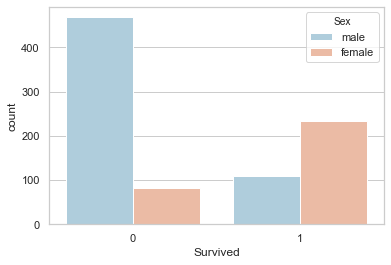

In [12]:
#count-plot of people survided 
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train_df, palette='RdBu_r')

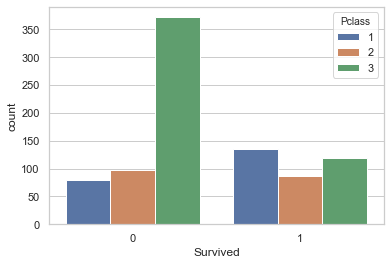

In [13]:
#no. of people who survived according to their Passenger Class
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train_df)

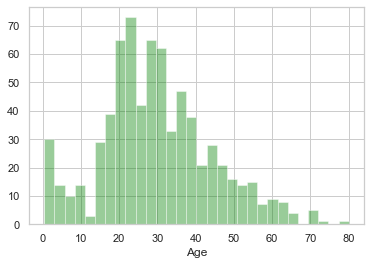

In [14]:
sns.distplot(train_df['Age'].dropna(), kde=False, bins=30, color='Green')

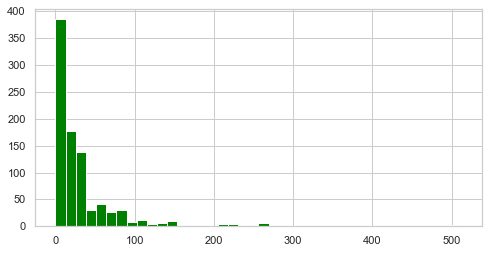

In [15]:
train_df['Fare'].hist(color='green',bins=40,figsize=(8,4))

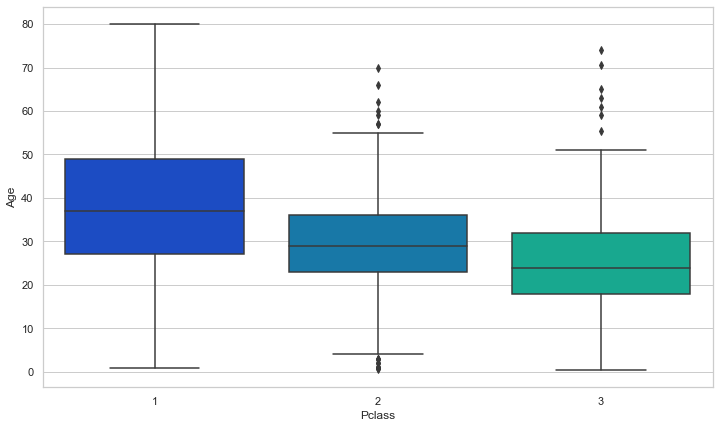

In [16]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train_df,palette='winter')

In [17]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
            return Age

In [18]:
train_df['Age'] = train_df[['Age','Pclass']].apply(impute_age,axis=1)

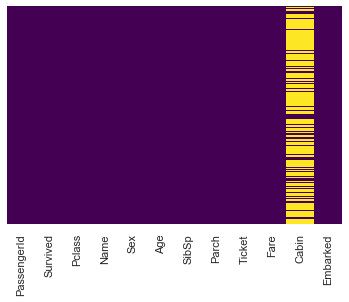

In [19]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [20]:
train_df.drop('Cabin',axis=1,inplace=True)
train_df.dropna(inplace=True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
sex = pd.get_dummies(train_df['Sex'],drop_first=True)
embark = pd.get_dummies(train_df['Embarked'],drop_first=True)
#drop the sex,embarked,name and tickets columns
train_df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
#concatenate new sex and embark column to our train dataframe
train_df = pd.concat([train_df,sex,embark],axis=1)
#check the head of dataframe
train_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [22]:
from sklearn.model_selection import train_test_split
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(train_df.drop('Survived',axis=1), train_df['Survived'], test_size=0.30, random_state=101)

In [23]:
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = LogisticRegression()
logmodel.fit(X_train_df, y_train_df)

C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
#predictions
Predictions = logmodel.predict(X_test_df)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test_df,Predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [30]:
from sklearn import metrics
print(confusion_matrix(y_test_df, Predictions))

[[151  12]
 [ 36  68]]
